# Bigram Model

### Set up imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random

### Load names file

In [4]:
# load the names
names = open('names.txt', 'r').read().splitlines()

print(len(names))

names

32033


['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn',
 'abigail',
 'emily',
 'elizabeth',
 'mila',
 'ella',
 'avery',
 'sofia',
 'camila',
 'aria',
 'scarlett',
 'victoria',
 'madison',
 'luna',
 'grace',
 'chloe',
 'penelope',
 'layla',
 'riley',
 'zoey',
 'nora',
 'lily',
 'eleanor',
 'hannah',
 'lillian',
 'addison',
 'aubrey',
 'ellie',
 'stella',
 'natalie',
 'zoe',
 'leah',
 'hazel',
 'violet',
 'aurora',
 'savannah',
 'audrey',
 'brooklyn',
 'bella',
 'claire',
 'skylar',
 'lucy',
 'paisley',
 'everly',
 'anna',
 'caroline',
 'nova',
 'genesis',
 'emilia',
 'kennedy',
 'samantha',
 'maya',
 'willow',
 'kinsley',
 'naomi',
 'aaliyah',
 'elena',
 'sarah',
 'ariana',
 'allison',
 'gabriella',
 'alice',
 'madelyn',
 'cora',
 'ruby',
 'eva',
 'serenity',
 'autumn',
 'adeline',
 'hailey',
 'gianna',
 'valentina',
 'isla',
 'eliana',
 'quinn',
 'nevaeh',
 'ivy',
 'sadie',
 'piper',
 'lydia',
 'alexa',
 'josephine',
 'emery',
 'julia'

### Calculate bigram frequency dataframe

In [8]:
# inspect all the characters in the names
chars = sorted(list(set(''.join(names))))

chars

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [9]:
# add start/end character to list
chars.append('.')

chars

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '.']

In [10]:
# create a matrix of zeros that is 27 x 27 using pandas
bigram_df = pd.DataFrame(0, index=chars, columns=chars)

bigram_df 

,a,b,c,d,e,f,g,h,i,j,...,r,s,t,u,v,w,x,y,z,.
a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
e,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
g,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
h,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
i,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
j,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# count the bigrams in the names and update the dataframe
for name in names:
    # add start and end characters to the name
    wrapped_name = '.' + name + '.'

    # loop over the letters of the name
    for index in range(len(wrapped_name) - 1):
        first_letter = wrapped_name[index]
        second_letter = wrapped_name[index + 1]

        # update the dataframe
        bigram_df.loc[first_letter, second_letter] += 1

bigram_df

,a,b,c,d,e,f,g,h,i,j,...,r,s,t,u,v,w,x,y,z,.
a,556,541,470,1042,692,134,168,2332,1650,175,...,3264,1118,687,381,834,161,182,2050,435,6640
b,321,38,1,65,655,0,0,41,217,1,...,842,8,2,45,0,0,0,83,0,114
c,815,0,42,1,551,0,2,664,271,3,...,76,5,35,35,0,0,3,104,4,97
d,1303,1,3,149,1283,5,25,118,674,9,...,424,29,4,92,17,23,0,317,1,516
e,679,121,153,384,1271,82,125,152,818,55,...,1958,861,580,69,463,50,132,1070,181,3983
f,242,0,0,0,123,44,1,1,160,0,...,114,6,18,10,0,4,0,14,2,80
g,330,3,0,19,334,1,25,360,190,3,...,201,30,31,85,1,26,0,31,1,108
h,2244,8,2,24,674,2,2,1,729,9,...,204,31,71,166,39,10,0,213,20,2409
i,2445,110,509,440,1653,101,428,95,82,76,...,849,1316,541,109,269,8,89,779,277,2489
j,1473,1,4,4,440,0,0,45,119,2,...,11,7,2,202,5,6,0,10,0,71


### Convert the bigram df to frequency

In [22]:
# convert the counts to probabilities
bigram_df = bigram_df.div(bigram_df.sum(axis=1), axis=0)

bigram_df

,a,b,c,d,e,f,g,h,i,j,...,r,s,t,u,v,w,x,y,z,.
a,0.016408,0.015966,0.013870,0.030751,0.020422,0.003955,0.004958,0.068821,0.048694,0.005165,...,0.096326,0.032994,0.020274,0.011244,0.024613,0.004751,0.005371,0.060499,0.012838,0.195957
b,0.121361,0.014367,0.000378,0.024575,0.247637,0.000000,0.000000,0.015501,0.082042,0.000378,...,0.318336,0.003025,0.000756,0.017013,0.000000,0.000000,0.000000,0.031380,0.000000,0.043100
c,0.230747,0.000000,0.011891,0.000283,0.156002,0.000000,0.000566,0.187995,0.076727,0.000849,...,0.021518,0.001416,0.009909,0.009909,0.000000,0.000000,0.000849,0.029445,0.001133,0.027463
d,0.237082,0.000182,0.000546,0.027111,0.233443,0.000910,0.004549,0.021470,0.122635,0.001638,...,0.077147,0.005277,0.000728,0.016739,0.003093,0.004185,0.000000,0.057678,0.000182,0.093886
e,0.033247,0.005925,0.007492,0.018802,0.062234,0.004015,0.006121,0.007443,0.040053,0.002693,...,0.095872,0.042158,0.028399,0.003379,0.022671,0.002448,0.006463,0.052392,0.008863,0.195025
f,0.267403,0.000000,0.000000,0.000000,0.135912,0.048619,0.001105,0.001105,0.176796,0.000000,...,0.125967,0.006630,0.019890,0.011050,0.000000,0.004420,0.000000,0.015470,0.002210,0.088398
g,0.171251,0.001557,0.000000,0.009860,0.173326,0.000519,0.012974,0.186819,0.098599,0.001557,...,0.104307,0.015568,0.016087,0.044110,0.000519,0.013492,0.000000,0.016087,0.000519,0.056046
h,0.294643,0.001050,0.000263,0.003151,0.088498,0.000263,0.000263,0.000131,0.095720,0.001182,...,0.026786,0.004070,0.009322,0.021796,0.005121,0.001313,0.000000,0.027967,0.002626,0.316308
i,0.138128,0.006214,0.028755,0.024857,0.093385,0.005706,0.024179,0.005367,0.004633,0.004294,...,0.047963,0.074346,0.030563,0.006158,0.015197,0.000452,0.005028,0.044009,0.015649,0.140614
j,0.507931,0.000345,0.001379,0.001379,0.151724,0.000000,0.000000,0.015517,0.041034,0.000690,...,0.003793,0.002414,0.000690,0.069655,0.001724,0.002069,0.000000,0.003448,0.000000,0.024483


### Visualize the df as a heatmap

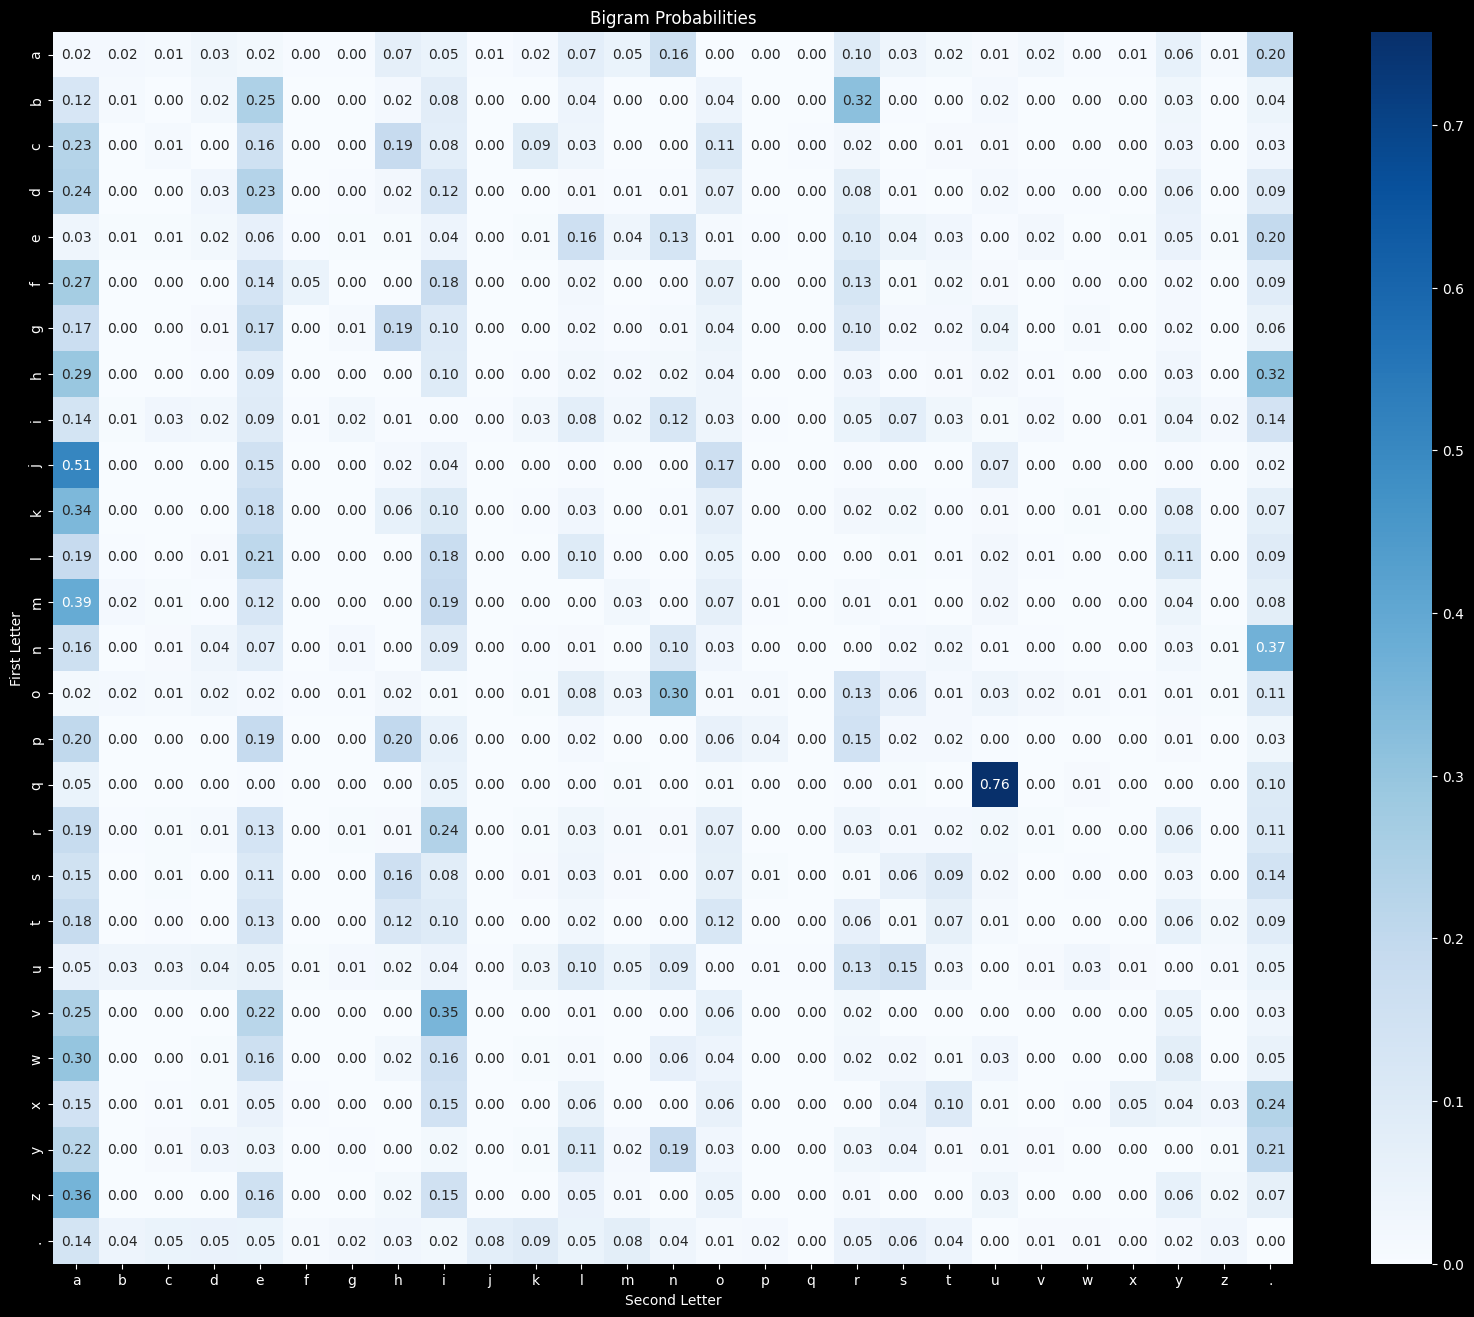

In [24]:
# create the frequency heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(bigram_df, annot=True, cmap='Blues', fmt='.2f')
plt.title('Bigram Probabilities')
plt.xlabel('Second Letter')
plt.ylabel('First Letter')
plt.show()

### Sample the probability matrix to generate new names

In [31]:
# define a string to hold the name
name = '.'

# loop until we get a end character
while True:
    prev_letter = name[-1]

    next_letter = random.choices(
        population=chars,
        weights=bigram_df.loc[prev_letter],
        k=1
    )[0]

    if next_letter == '.':
        break
    
    name += next_letter

name

'.ssoonrian'

### Define a function to generate new names

In [39]:
# define a function to generate a name
def generate_name():
    # define a string to hold the name
    name = '.'

    # loop until we get a end character
    while True:
        prev_letter = name[-1]

        next_letter = random.choices(
            population=chars,
            weights=bigram_df.loc[prev_letter],
            k=1
        )[0]

        if next_letter == '.':
            break
        
        name += next_letter

    name = name[1:]

    return name
        
generate_name()

'ela'

In [40]:
# write a loop to generate 50 names
for index in range(50):
    print(generate_name())

g
xa
elyain
jacicopita
aleviamali
otarti
odrevol
mosson
foubaa
kifron
maa
ra
iusa
ayver
mmare
nelenar
br
halaheeshas
kuza
ssiawa
s
bllenare
llan
a
aholymirie
b
t
brdererama
ne
ja
saraloreya
l
ja
cal
i
rath
enrese
anes
slam
zytidumi
evyai
nay
ndamayncrrisirlinstyzi
leriphifati
as
bishibriva
aliaretviayrizatolamelilo
deiy
clyn
kalyca
